In [1]:

# Install necessary libraries
!pip install -q nltk spacy docx2txt pandas matplotlib wordcloud

# Download NLTK data
import nltk
nltk.download('punkt')        # For tokenization
nltk.download('stopwords')    # For stop words
nltk.download('wordnet')      # For lemmatization
nltk.download('averaged_perceptron_tagger') # For POS tagging
nltk.download('omw-1.4')      # For WordNet data
nltk.download('punkt_tab')    # Download the missing resource for sentence tokenization


# Download spaCy model
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.7 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Sample text representing a part of a document
sample_document = """
Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. Mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

In its application across business problems, machine learning is also referred to as predictive analytics.
"""

# Let's also add some text with punctuation, numbers, and mixed casing
noisy_text = """
Machine learning rocks! It's revolutionizing the world in 2023 (and beyond!).
Visit our site: http://example.com for more info.
This is awesome!!! We collected 1,234 data points.
Softbank and Google are major players.
"""

In [3]:
print("--- Sample Document ---")
print(sample_document)
print("\n--- Noisy Text ---")
print(noisy_text)


######
### Note: For loading .docx files, you would typically do:

# import docx2txt
# try:
#     text = docx2txt.process("your_document.docx")
#     print(text)
# except Exception as e:
#     print(f"Error loading docx: {e}")

raw_data = sample_document + '\n' + noisy_text
print('Raw data size: ' , len(raw_data))
print('*'*400)
print(raw_data)

--- Sample Document ---

Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. Mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

In its application across business problems, mach

# initial text cleaning


### convert to lower case.


In [4]:
lowerdata = raw_data.lower()
print('*'*4000  , '\nlowered data:', '\n' , lowerdata)

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

## Remove urls using regex:


In [5]:
import regex as re

def removelinks(data):
    pattern = r'https?://\S+|www\.\S+'
    return re.sub(pattern , '' , lowerdata)

print(removelinks(lowerdata))
cdata = removelinks(lowerdata)


machine learning (ml) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. a subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. mathematical optimization delivers methods, theory and application domains to the field of machine learning. data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

in its application across business problems, machine learning is also ref

## Remove punctuations using string punctuations , string.maketrans() and string.translate():


In [6]:
import string
translateTable = str.maketrans('' , '' , string.punctuation)
print(str.translate(cdata , translateTable))
pdata = str.translate(cdata , translateTable)


machine learning ml is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data algorithms build a mathematical model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to perform the task

machine learning algorithms are used in a wide variety of applications such as email filtering and computer vision where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers mathematical optimization delivers methods theory and application domains to the field of machine learning data mining is a related field of study focusing on exploratory data analysis through unsupervised learning

in its application across business problems machine learning is also referred to as predic

## Remove digits and extra-whitespaces:


In [7]:
def clean(data):
    data = re.sub(r'\d+' , '' , data)
    return re.sub(r'\s+' , ' ' , data)
print(clean(pdata))
cdata = clean(pdata)

 machine learning ml is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data algorithms build a mathematical model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to perform the task machine learning algorithms are used in a wide variety of applications such as email filtering and computer vision where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers mathematical optimization delivers methods theory and application domains to the field of machine learning data mining is a related field of study focusing on exploratory data analysis through unsupervised learning in its application across business problems machine learning is also referred to as predicti

## Tokenization using nltk:


In [8]:
from nltk.tokenize import sent_tokenize , word_tokenize

stokens = sent_tokenize(raw_data)

for i , sentence in enumerate(stokens):
    print(f'Sentence {i+1}: {sentence}')


Sentence 1: 
Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data.
Sentence 2: Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.
Sentence 3: Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.
Sentence 4: A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers.
Sentence 5: Mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Sentence 6: Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.
Sen

## Tokenization using spacy:


In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')
sdoc = nlp(raw_data)
sentences = [ sentence.text for sentence in sdoc.sents]
for i , sentence in enumerate(sentences):
    print(f'Sentence {i+1}: {sentence}')

Sentence 1: 
Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data.
Sentence 2: Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.


Sentence 3: Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.
Sentence 4: A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers.
Sentence 5: Mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Sentence 6: Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.



### word tokenization


In [10]:
words = word_tokenize(cdata)

sclean = nlp(cdata)
swords = [token.text for token in sclean]

print(len(words) , len(swords))

180 181


## Stop words removal:


In [11]:
from nltk.corpus import stopwords

sswords = set(stopwords.words('english'))
nstop = [word for word in words if word not in sswords]

#remove using spacy:
snstop = [word.text for word in sclean if not word.is_stop ]

print(f'{len(nstop)=} , {len(snstop)=}')

len(nstop)=113 , len(snstop)=106


## stemming and lemmatization:


In [12]:
from nltk.stem import PorterStemmer , WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_words = [stemmer.stem(word) for word in nstop]

lemmed_words = [lemmatizer.lemmatize(word) for word in nstop]
print(stemmed_words[:10] , '\n' , lemmed_words[:10])

['machin', 'learn', 'ml', 'field', 'studi', 'artifici', 'intellig', 'concern', 'develop', 'comput'] 
 ['machine', 'learning', 'ml', 'field', 'study', 'artificial', 'intelligence', 'concerned', 'development', 'computer']


In [13]:
#stemming using spacy:

spacy_stemmed_words = [stemmer.stem(word.text) for word in sclean if not word.is_stop]
# lemmatization using spacy:
spacy_lemmed_words = [word.lemma_ for word in sclean if not word.is_stop]
# spacy_stemmed_words
print(f"{spacy_stemmed_words[:10]=} , '\n' ,{spacy_lemmed_words[:10]=}")

spacy_stemmed_words[:10]=[' ', 'machin', 'learn', 'ml', 'field', 'studi', 'artifici', 'intellig', 'concern', 'develop'] , '
' ,spacy_lemmed_words[:10]=[' ', 'machine', 'learning', 'ml', 'field', 'study', 'artificial', 'intelligence', 'concern', 'development']


## Bag O Words:


In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Sample noisy texts

texts = [
"Machine learning rocks! It's revolutionizing the world in 2023 (and beyond!). Visit our site: http://example.com for more info.",
"This is awesome!!! We collected 1,234 data points.",
"Softbank and Google are major players.",
"Predictive analytics uses machine learning to solve business problems.",
]

stop_words = set(stopwords.words('english'))

def clean_text(text): # Lowercase
    text = text.lower() # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove numbers
    text = re.sub(r'\d+', '', text) # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Process text with SpaCy
    doc = nlp(text)

    # Lemmatization + remove stopwords + tokens length > 1 (to skip leftover punct or spaces)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and len(token.text) > 1]

    # Join back to string
    cleaned_text = " ".join(tokens)
    return cleaned_text

cleaned_texts = [clean_text(text) for text in texts]

print("Cleaned Texts:")
for i, txt in enumerate(cleaned_texts, 1):
    print(f"{i}: {txt}")


Cleaned Texts:
1: machine learning rock revolutionize world beyond visit site info
2: awesome collect data point
3: softbank google major player
4: predictive analytic use machine learn solve business problem


In [15]:
vectorizer = CountVectorizer()
bmatrix = vectorizer.fit_transform(cleaned_texts)

df = pd.DataFrame(bmatrix.toarray() , columns = vectorizer.get_feature_names_out())
df.index = [f"Doc_{i+1}" for i in range(len(cleaned_texts))]
df

,analytic,awesome,beyond,business,collect,data,google,info,learn,learning,...,predictive,problem,revolutionize,rock,site,softbank,solve,use,visit,world
Doc_1,0,0,1,0,0,0,0,1,0,1,...,0,0,1,1,1,0,0,0,1,1
Doc_2,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc_3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Doc_4,1,0,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,1,1,0,0


## TFIDF:


In [16]:
tvectorizer = TfidfVectorizer()

tfidf = tvectorizer.fit_transform(cleaned_texts)

df = pd.DataFrame(tfidf.toarray() , columns = tvectorizer.get_feature_names_out()).round(3)
df.index = [f"Doc_{i+1}" for i in range(len(cleaned_texts))]
df

,analytic,awesome,beyond,business,collect,data,google,info,learn,learning,...,predictive,problem,revolutionize,rock,site,softbank,solve,use,visit,world
Doc_1,0.000,0.0,0.341,0.000,0.0,0.0,0.0,0.341,0.000,0.341,...,0.000,0.000,0.341,0.341,0.341,0.0,0.000,0.000,0.341,0.341
Doc_2,0.000,0.5,0.000,0.000,0.5,0.5,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
Doc_3,0.000,0.0,0.000,0.000,0.0,0.0,0.5,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.5,0.000,0.000,0.000,0.000
Doc_4,0.362,0.0,0.000,0.362,0.0,0.0,0.0,0.000,0.362,0.000,...,0.362,0.362,0.000,0.000,0.000,0.0,0.362,0.362,0.000,0.000


## POS Tagging:


In [17]:
print('--------------------------------------POS Tagging with Spacy--------------------------------------')
for i , word in enumerate(sclean):
    print(f"{i+1}: {word.text} -> {word.pos_} ({word.tag_})")

--------------------------------------POS Tagging with Spacy--------------------------------------
1:   -> SPACE (_SP)
2: machine -> NOUN (NN)
3: learning -> NOUN (NN)
4: ml -> PROPN (NNP)
5: is -> AUX (VBZ)
6: a -> DET (DT)
7: field -> NOUN (NN)
8: of -> ADP (IN)
9: study -> NOUN (NN)
10: in -> ADP (IN)
11: artificial -> ADJ (JJ)
12: intelligence -> NOUN (NN)
13: concerned -> VERB (VBN)
14: with -> ADP (IN)
15: the -> DET (DT)
16: development -> NOUN (NN)
17: of -> ADP (IN)
18: computer -> NOUN (NN)
19: algorithms -> NOUN (NNS)
20: that -> PRON (WDT)
21: can -> AUX (MD)
22: learn -> VERB (VB)
23: from -> ADP (IN)
24: and -> CCONJ (CC)
25: make -> VERB (VB)
26: predictions -> NOUN (NNS)
27: on -> ADP (IN)
28: data -> NOUN (NNS)
29: algorithms -> NOUN (NNS)
30: build -> VERB (VB)
31: a -> DET (DT)
32: mathematical -> ADJ (JJ)
33: model -> NOUN (NN)
34: based -> VERB (VBN)
35: on -> ADP (IN)
36: sample -> NOUN (NN)
37: data -> NOUN (NNS)
38: known -> VERB (VBN)
39: as -> ADP (IN)
40: tra

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# plt.style.use('dark_background')
mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=['blue'])

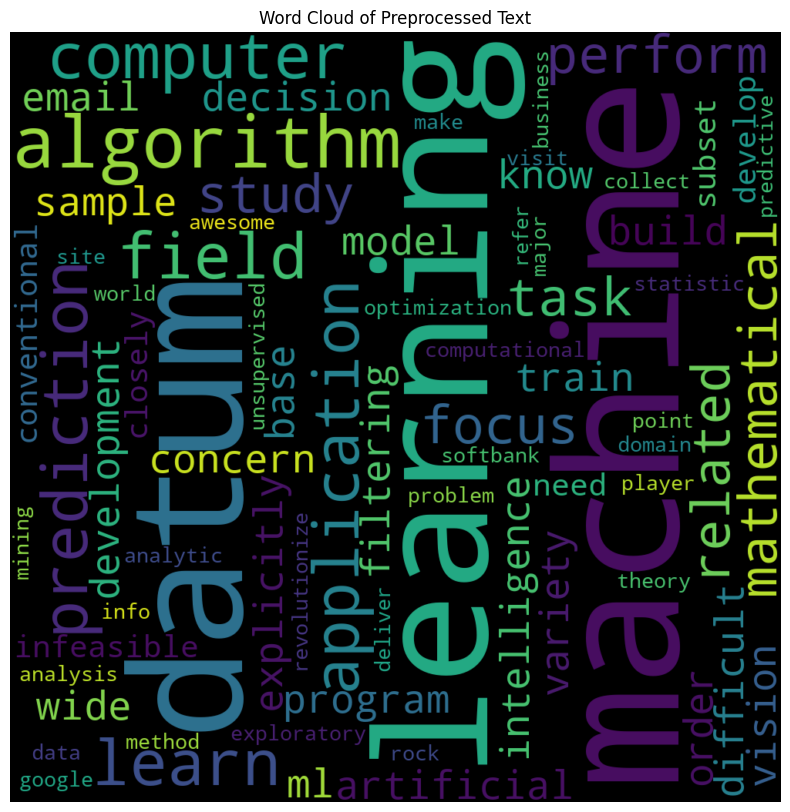

In [24]:
from wordcloud import WordCloud

cloudText = " ".join(spacy_lemmed_words[1:])

cloud = WordCloud(width = 1000 , height = 1000 , background_color='black').generate(cloudText)
plt.figure(figsize=(20,10))
plt.imshow(cloud , interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Preprocessed Text")
plt.show()

# Rough


In [32]:
text = "Don't do that!"

#tokenize using nltk
print(word_tokenize(text))
doc = nlp(text)
[token.text for token in doc]

['Do', "n't", 'do', 'that', '!']


['Do', "n't", 'do', 'that', '!']

In [35]:
text = "I was running late"
doc = nlp(text)
for i , word in enumerate(doc):
    print(f"{word} -> {word.pos_} ({word.tag_})")

I -> PRON (PRP)
was -> AUX (VBD)
running -> VERB (VBG)
late -> ADV (RB)


In [37]:

stops = set(stopwords.words('english'))
pwords = ['this', 'is', 'a', 'test', 'for', 'stopword', 'removal']

[word for word in pwords if word not in stops]

['test', 'stopword', 'removal']

In [66]:
from collections import Counter

#lower text:
text = "Hello, hello world! NLP world."
text = text.lower()
print(f"lowered text: {text}")

#remove punctuations:

ttable = str.maketrans('' , '' , string.punctuation)
text = str.translate(text , ttable)
print(f"punctuations removed: {text}")


#count words:

words = text.strip().split(' ')
wordcounts = Counter(words)
print(f"{wordcounts=}")

#sort by keys:
list(dict(sorted(wordcounts.items())).values())

lowered text: hello, hello world! nlp world.
punctuations removed: hello hello world nlp world
wordcounts=Counter({'hello': 2, 'world': 2, 'nlp': 1})


[2, 1, 2]

In [ ]:
from nltk.tokenize import word_tokenize

words = word_tokenize(text)


['hello', 'hello', 'world', 'nlp', 'world']

In [56]:
from collections import Counter

wordcount = Counter(words)
ans = dict(sorted(wordcount.items()))
ans

{'hello': 2, 'nlp': 1, 'world': 2}

In [90]:
text = '''Machine learning Rocks! Visit https://example.com now.
Data points: 1,234 are collected.'''

def cleantext(raw : string):

    #lower text:
    lower : string  = raw.lower()

    #remove urls:

    pattern = r'https?://\S+|www\.\S+'
    rurls : string = re.sub(pattern , '' , lower)

    #remove punctuations:
    
    ttable = str.maketrans('' , '' , string.punctuation)

    nopunct = str.translate(rurls , ttable)

    print(f'{nopunct = }')
    # remove all digits:

    nods = re.sub(r'\d' , '' , nopunct)

    print(f'{nods = }')
    #collapse a seq of white-spaces into a single space and strip leading/trailing zeros:
    
    nospace = re.sub(r'\s+' , ' ' , nods)

    print(f'{nospace = }')

    return nospace.strip()


cleantext(text)

nopunct = 'machine learning rocks visit  now\ndata points 1234 are collected'
nods = 'machine learning rocks visit  now\ndata points  are collected'
nospace = 'machine learning rocks visit now data points are collected'


'machine learning rocks visit now data points are collected'

In [ ]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for word in doc:
    print(word , word.pos_ , word.tag_)

Softbank PROPN NNP
invested VERB VBD
$ SYM $
2.3 NUM CD
billion NUM CD
in ADP IN
India PROPN NNP
in ADP IN
2023 NUM CD
. PUNCT .


In [94]:
doc = nlp("Softbank invested $2.3 billion in India in 2023.")
for ent in doc.ents:
    print(ent.text , ent.label_)

Softbank ORG
$2.3 billion MONEY
India GPE
2023 DATE


In [98]:
entities = nlp.get_pipe('ner')
sorted(entities.labels)

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [101]:
nlp('better')[0].lemma_

'well'